In [67]:
# Preparing imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

In [68]:
orientations_politiques = {
    'ARTHAUD': 'Extrême Gauche',
    'ROUSSEL': 'Gauche',
    'MACRON': 'Centre',
    'LE PEN': 'Extrême Droite',
    'CHEMINADE': 'Extrême Droite',
    'MÉLENCHON': 'Gauche',
    'ASSELINEAU': 'Droite',
    'LASSALLE': 'Centre',
    'ZEMMOUR': 'Extrême Droite',
    'FILLON': 'Droite',
    'HAMON': 'Gauche',  
    'HIDALGO': 'Gauche',
    'JADOT': 'Gauche',
    'PÉCRESSE': 'Droite',
    'POUTOU': 'Extrême Gauche',
    'DUPONT-AIGNAN': 'Droite',
    'LAGUILLER' : 'Extrême Gauche',
    'BOUSSEL' : 'Extrême Gauche',
    'JUQUIN' : 'Extrême Gauche', 
    'LAJOINIE' : 'Gauche',
    'MITTERRAND' : 'Gauche',
    'WAECHTER' : 'Gauche',
    'BARRE' : 'Droite',
    'CHIRAC' : 'Droite',
    'HUE' : 'Extrême Gauche',
    'JOSPIN' : 'Gauche',
    'VOYNET' : 'Gauche',
    'BALLADUR' : 'Droite',
    'DE VILLIERS' : 'Droite'
}

colors = {
    'Extrême Gauche': 'red',
    'Gauche': 'orange',
    'Centre': 'pink',
    'Droite': 'blue',
    'Extrême Droite': 'black',
    'Autre': 'gray'
}

chomage = {
    '1988' : 7.27,
    '1995' : 8.8,
    '2017' : 8.1,
    '2022' : 6.92
}


In [69]:
########################################
###
### Analysing data for 1988
###
########################################

In [70]:
# Loading file for 1988
data88 = pd.read_csv('1988.csv')

In [71]:
# Convert the column "Code du département" to string type
data88["Code du département"] = data88["Code du département"].astype(str)

# Filter the data for the Île-de-France region
idf_data88 = data88[data88['Code du département'].str.startswith('75') | data88['Code du département'].str.startswith('77') |
                    data88['Code du département'].str.startswith('78') | data88['Code du département'].str.startswith('91') |
                    data88['Code du département'].str.startswith('92') | data88['Code du département'].str.startswith('93') |
                    data88['Code du département'].str.startswith('94') | data88['Code du département'].str.startswith('95')]

# Add a column "Orientation" based on the political orientations
idf_data88['Orientation'] = idf_data88['Nom'].map(orientations_politiques)

# Replace missing values with "Other" in the "Orientation" column
idf_data88['Orientation'] = idf_data88['Orientation'].fillna('Autre')

# Group data by "Orientation" and "Nom" to get the total number of votes
grouped_data88 = idf_data88.groupby(['Orientation', 'Nom'])['Voix'].sum().reset_index()

# Sort data based on the total number of votes (in descending order) for each political spectrum
grouped_data_by_orientation88 = grouped_data88.groupby('Orientation')['Voix'].sum().reset_index()
grouped_data_by_orientation88.sort_values(by='Voix', ascending=False, inplace=True)

Gauche   1658216
Droite   1453993
Extrême Droite   612986
Extrême Gauche   182180


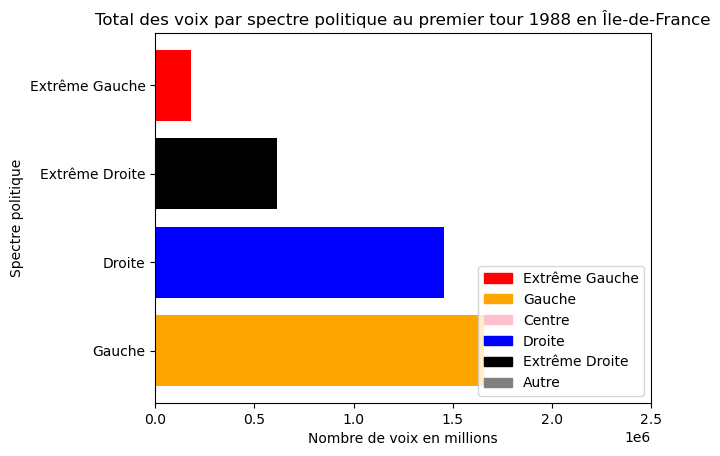

In [72]:
# Displaying the chart using colors by political spectrum
fig, ax = plt.subplots()
for index, row in grouped_data_by_orientation88.iterrows():
    orientation = row['Orientation']
    color = colors.get(orientation, 'gray')  # Utiliser la couleur par défaut 'gray' si l'orientation n'est pas trouvée
    ax.barh(orientation, row['Voix'], color=color)
    print(row['Orientation'], " ", row['Voix'])

# Creation of variables for 1988
# Orientation1988 = grouped_data_by_orientation88['Orientation'].iloc[0]
# Votes1988 = grouped_data_by_orientation88['Votes'].iloc[0]
Elections88 = {
    'EG' : grouped_data_by_orientation88['Voix'].iloc[3],
    'ED' : grouped_data_by_orientation88['Voix'].iloc[2],
    'D' : grouped_data_by_orientation88['Voix'].iloc[1],
    'G' : grouped_data_by_orientation88['Voix'].iloc[0]
}

# Definition of ticks on the x-axis
xticks = range(0, int(grouped_data_by_orientation88['Voix'].max()) + 1000000, 500000)
plt.xticks(xticks)

# Creating the legend for political spectra
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = colors.keys()
plt.legend(legend_colors, legend_labels, loc='lower right')

plt.xlabel("Nombre de voix en millions")
plt.ylabel("Spectre politique")
plt.title("Total des voix par spectre politique au premier tour 1988 en Île-de-France")

plt.show()

In [73]:
########################################
###
### Analysing data for 1995
###
########################################

In [74]:
# Loading file for 1995
data95 = pd.read_csv('1995.csv')

In [75]:
# Convert the column "Code du département" to string type
data95["Code du département"] = data95["Code du département"].astype(str)

# Filter the data for the Île-de-France region
idf_data95 = data95[data95['Code du département'].str.startswith('75') | data95['Code du département'].str.startswith('77') |
                    data95['Code du département'].str.startswith('78') | data95['Code du département'].str.startswith('91') |
                    data95['Code du département'].str.startswith('92') | data95['Code du département'].str.startswith('93') |
                    data95['Code du département'].str.startswith('94') | data95['Code du département'].str.startswith('95')]

# Add a column "Orientation" based on the political orientations
idf_data95['Orientation'] = idf_data95['Nom'].map(orientations_politiques)

# Replace missing values with "Other" in the "Orientation" column
idf_data95['Orientation'] = idf_data95['Orientation'].fillna('Autre')

# Group data by "Orientation" and "Nom" to get the total number of votes
grouped_data95 = idf_data95.groupby(['Orientation', 'Nom'])['Voix'].sum().reset_index()

# Sort data based on the total number of votes (in descending order) for each political spectrum
grouped_data_by_orientation95 = grouped_data95.groupby('Orientation')['Voix'].sum().reset_index()
grouped_data_by_orientation95.sort_values(by='Voix', ascending=False, inplace=True)

Droite   1617620
Gauche   989454
Extrême Gauche   514058
Extrême Droite   495602


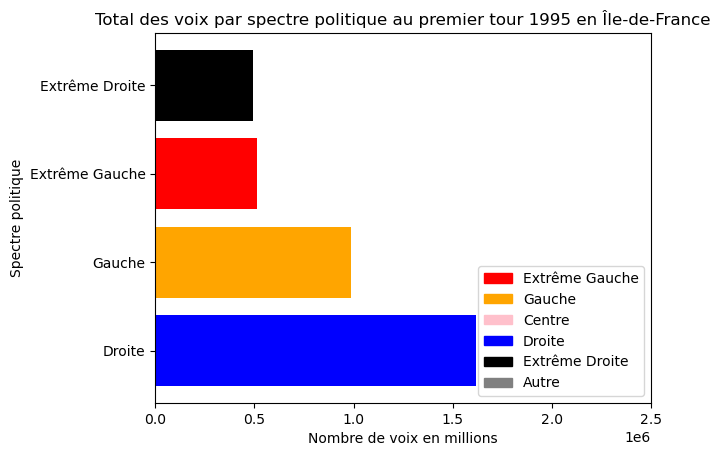

In [76]:
# Displaying the chart using colors by political spectrum
fig, ax = plt.subplots()
for index, row in grouped_data_by_orientation95.iterrows():
    orientation = row['Orientation']
    color = colors.get(orientation, 'gray')  # Utiliser la couleur par défaut 'gray' si l'orientation n'est pas trouvée
    ax.barh(orientation, row['Voix'], color=color)
    print(row['Orientation'], " ", row['Voix'])

# Creating variables for 1995
Elections95 = {
    'ED' : grouped_data_by_orientation95['Voix'].iloc[3],
    'EG' : grouped_data_by_orientation95['Voix'].iloc[2],
    'G' : grouped_data_by_orientation95['Voix'].iloc[1],
    'D' : grouped_data_by_orientation95['Voix'].iloc[0]
}

# Defining marks on the x-axis
xticks = range(0, int(grouped_data_by_orientation95['Voix'].max()) + 1000000, 500000)
plt.xticks(xticks)

# Creating the legend for political spectra
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = colors.keys()
plt.legend(legend_colors, legend_labels, loc='lower right')

plt.xlabel("Nombre de voix en millions")
plt.ylabel("Spectre politique")
plt.title("Total des voix par spectre politique au premier tour 1995 en Île-de-France")

plt.show()

In [77]:
########################################
###
### Analysing data for 2017
###
########################################

In [78]:
# Loading file for 2017
data17 = pd.read_csv('2017.csv')

In [79]:
# Create an explicit copy of the DataFrame data17
idf_data17 = data17.copy()

# Convert the column "Code du département" to string type
idf_data17["Code du département"] = idf_data17["Code du département"].astype(str)

# Filter the data for the Île-de-France region
idf_data17 = idf_data17[idf_data17['Code du département'].str.startswith('75') | idf_data17['Code du département'].str.startswith('77') |
                        idf_data17['Code du département'].str.startswith('78') | idf_data17['Code du département'].str.startswith('91') |
                        idf_data17['Code du département'].str.startswith('92') | idf_data17['Code du département'].str.startswith('93') |
                        idf_data17['Code du département'].str.startswith('94') | idf_data17['Code du département'].str.startswith('95')]

# Add a column "Orientation" based on political orientations
idf_data17['Orientation'] = idf_data17['Nom'].map(orientations_politiques)

# Replace missing values with "Autre" (Other) in the "Orientation" column
idf_data17['Orientation'] = idf_data17['Orientation'].fillna('Autre')

# Group the data by "Orientation" and "Nom" to get the total votes
grouped_data17 = idf_data17.groupby(['Orientation', 'Nom'])['Voix'].sum().reset_index()

Droite   2263312
Gauche   2072148
Centre   1778969
Extrême Droite   873342
Extrême Gauche   69287


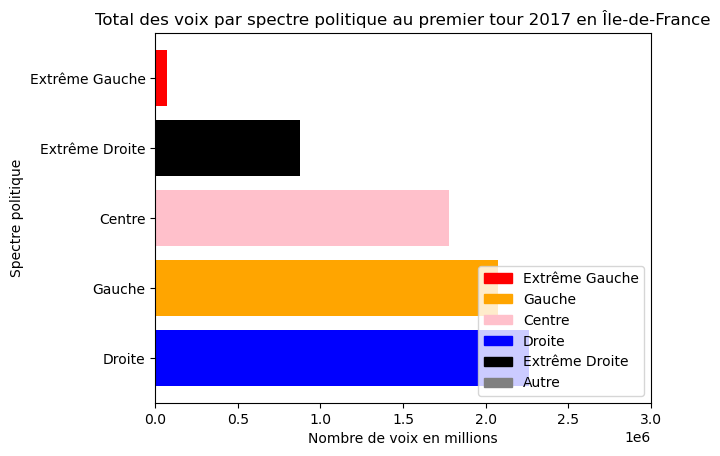

In [80]:
# Sort the data based on the total votes (in descending order) for each political spectrum
grouped_data_by_orientation17 = grouped_data17.groupby('Orientation')['Voix'].sum().reset_index()
grouped_data_by_orientation17.sort_values(by='Voix', ascending=False, inplace=True)

# Displaying the chart using colors by political spectrum
fig, ax = plt.subplots()
for index, row in grouped_data_by_orientation17.iterrows():
    orientation = row['Orientation']
    color = colors.get(orientation, 'gray')  # Utiliser la couleur par défaut 'gray' si l'orientation n'est pas trouvée
    ax.barh(orientation, row['Voix'], color=color)
    print(row['Orientation'], " ", row['Voix'])
    
# Creating variables for 2017

Elections17 = {
    'EG' : grouped_data_by_orientation17['Voix'].iloc[4],
    'ED' : grouped_data_by_orientation17['Voix'].iloc[3],
    'C' : grouped_data_by_orientation17['Voix'].iloc[2],
    'G' : grouped_data_by_orientation17['Voix'].iloc[1],
    'D' : grouped_data_by_orientation17['Voix'].iloc[0]
}
    
# Defining marks on the x-axis
xticks = range(0, int(grouped_data_by_orientation17['Voix'].max()) + 1000000, 500000)
plt.xticks(xticks)

# Creating the legend for political spectra
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = colors.keys()
plt.legend(legend_colors, legend_labels, loc='lower right')

plt.xlabel("Nombre de voix en millions")
plt.ylabel("Spectre politique")
plt.title("Total des voix par spectre politique au premier tour 2017 en Île-de-France")

plt.show()

In [81]:
########################################
###
### Analysing data for 2022
###
########################################

#Code is same as before no need for commentary, see above for explaination

In [82]:
data22 = pd.read_csv('2022.csv')

In [83]:
data22["Code du département"] = data22["Code du département"].astype(str)

idf_data22 = data22[data22['Code du département'].str.startswith('75') | data22['Code du département'].str.startswith('77') |
                    data22['Code du département'].str.startswith('78') | data22['Code du département'].str.startswith('91') |
                    data22['Code du département'].str.startswith('92') | data22['Code du département'].str.startswith('93') |
                    data22['Code du département'].str.startswith('94') | data22['Code du département'].str.startswith('95')]

idf_data22['Orientation'] = idf_data22['Nom'].map(orientations_politiques)

idf_data22['Orientation'] = idf_data22['Orientation'].fillna('Autre')

grouped_data22 = idf_data22.groupby(['Orientation', 'Nom'])['Voix'].sum().reset_index()


Gauche   2138347
Centre   1743123
Extrême Droite   1120858
Droite   426702
Extrême Gauche   54944


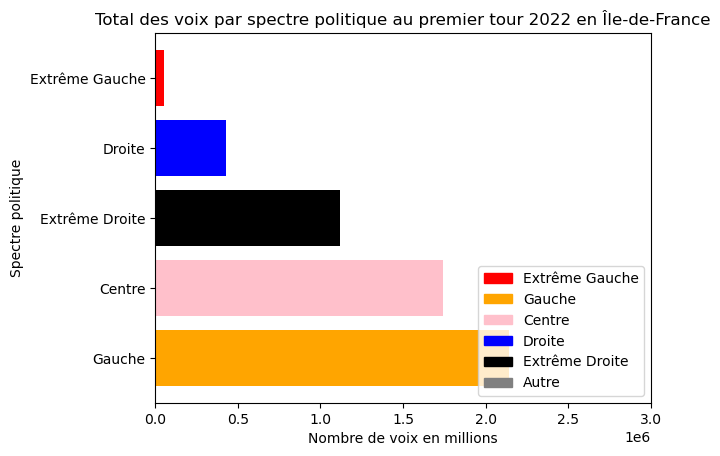

In [84]:
grouped_data_by_orientation22 = grouped_data22.groupby('Orientation')['Voix'].sum().reset_index()
grouped_data_by_orientation22.sort_values(by='Voix', ascending=False, inplace=True)

fig, ax = plt.subplots()
for index, row in grouped_data_by_orientation22.iterrows():
    orientation = row['Orientation']
    color = colors.get(orientation, 'gray')  # Utiliser la couleur par défaut 'gray' si l'orientation n'est pas trouvée
    ax.barh(orientation, row['Voix'], color=color)
    print(row['Orientation'], " ", row['Voix'])

Elections22 = {
    'EG' : grouped_data_by_orientation22['Voix'].iloc[4],
    'ED' : grouped_data_by_orientation22['Voix'].iloc[3],
    'C' : grouped_data_by_orientation22['Voix'].iloc[2],
    'G' : grouped_data_by_orientation22['Voix'].iloc[1],
    'D' : grouped_data_by_orientation22['Voix'].iloc[0]
}
    
xticks = range(0, int(grouped_data_by_orientation22['Voix'].max()) + 1000000, 500000)
plt.xticks(xticks)

legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
legend_labels = colors.keys()
plt.legend(legend_colors, legend_labels, loc='lower right')

plt.xlabel("Nombre de voix en millions")
plt.ylabel("Spectre politique")
plt.title("Total des voix par spectre politique au premier tour 2022 en Île-de-France")

plt.show()

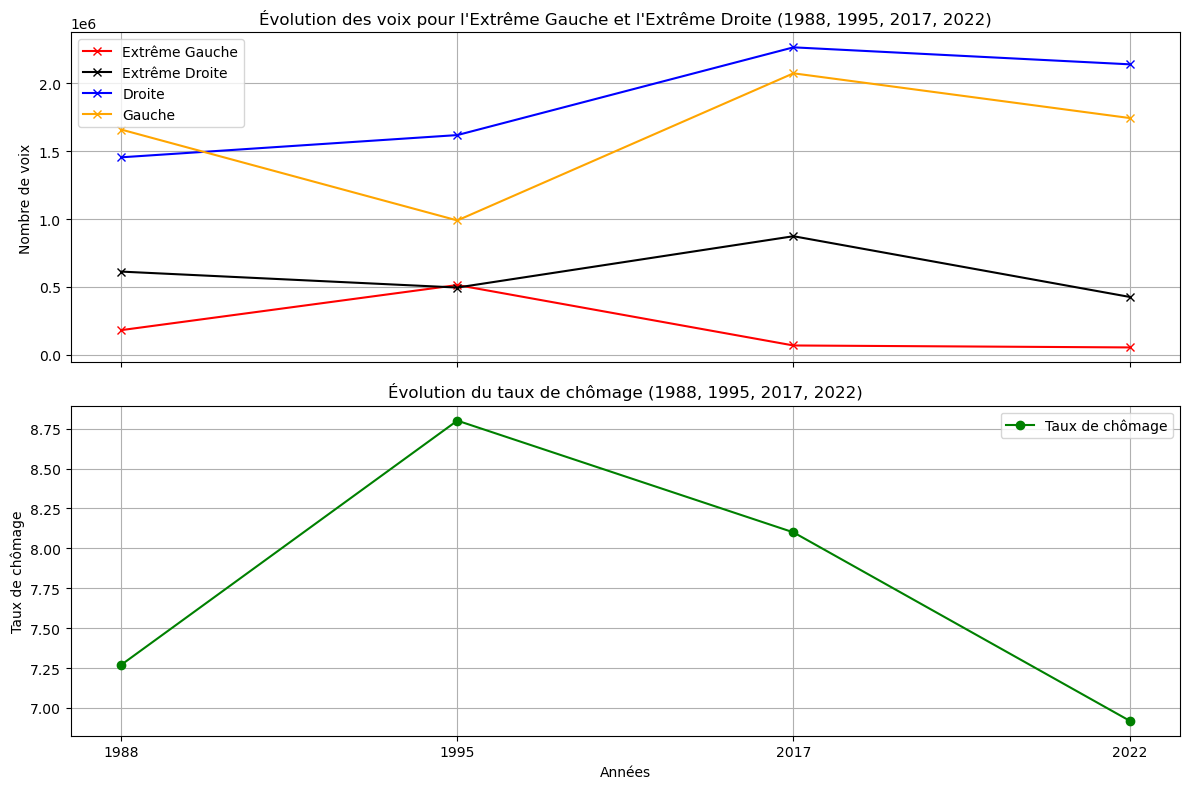

In [85]:
import matplotlib.pyplot as plt

# Unemployment data
chomage = {
    '1988': 7.27,
    '1995': 8.8,
    '2017': 8.1,
    '2022': 6.92
}

# Data for votes for each year and unemployment rate
annees = ['1988', '1995', '2017', '2022']
ExtremeGauche = [Elections88['EG'], Elections95['EG'], Elections17['EG'], Elections22['EG']]
ExtremeDroite = [Elections88['ED'], Elections95['ED'], Elections17['ED'], Elections22['ED']]
Droite = [Elections88['D'], Elections95['D'], Elections17['D'], Elections22['D']]
Gauche = [Elections88['G'], Elections95['G'], Elections17['G'], Elections22['G']]
Centre = [Elections17['C'], Elections22['C']]


Chomage = [chomage['1988'], chomage['1995'], chomage['2017'], chomage['2022']]

# Create the main graph with two subplots (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Vote by specter curve
ax1.plot(annees, ExtremeGauche, marker='x', color='red', label='Extrême Gauche')

ax1.plot(annees, ExtremeDroite, marker='x', color='black', label='Extrême Droite')

ax1.plot(annees, Droite, marker='x', color='blue', label='Droite')

ax1.plot(annees, Gauche, marker='x', color='orange', label='Gauche')

#ax1.plot(annees, Centre, marker='x', color='pink', label='Centre')



ax1.set_ylabel('Nombre de voix')
ax1.set_title("Évolution des voix pour l'Extrême Gauche et l'Extrême Droite (1988, 1995, 2017, 2022)")
ax1.legend()
ax1.grid(True)

# Unemployment rate curve
ax2.plot(annees, Chomage, marker='o', color='green', label='Taux de chômage')

ax2.set_xlabel('Années')
ax2.set_ylabel('Taux de chômage')
ax2.set_title('Évolution du taux de chômage (1988, 1995, 2017, 2022)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # To avoid overlapping labels
plt.show()